# Airbnb Price Prediction
### Date: 05.02.2025
### Author: Konrad Wróński
### Dataset: https://www.kaggle.com/datasets/konradb/inside-airbnb-netherlands
Description: Based on Airbnb data, I will try to predict the price of a room. Data comes from 3 different dutch cities: Amsterdam, Rotterdam and The Hague.

### 1. Importing the libraries

In [2]:
import kagglehub
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

/Users/konradwronski/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/1m/mckmrfpx3yn1g1wj1m8cxm000000gn/T/ipykernel_20591/1800241846.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 2. Data Injection

In [3]:
path = kagglehub.dataset_download("konradb/inside-airbnb-netherlands")

print("Path to dataset files:", path)

Path to dataset files: /Users/konradwronski/.cache/kagglehub/datasets/konradb/inside-airbnb-netherlands/versions/2


In [4]:
amsterdam = pd.read_csv("/Users/konradwronski/.cache/kagglehub/datasets/konradb/inside-airbnb-netherlands/versions/2/netherlands/Amsterdam/listings_detailed.csv")
rotterdam = pd.read_csv("/Users/konradwronski/.cache/kagglehub/datasets/konradb/inside-airbnb-netherlands/versions/2/netherlands/Rotterdam/listings_detailed.csv")
hague = pd.read_csv("/Users/konradwronski/.cache/kagglehub/datasets/konradb/inside-airbnb-netherlands/versions/2/netherlands/The Hague/listings_detailed.csv")

### 3.Data Cleaning

In [5]:
amsterdam.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20230309202119,2023-03-09,city scrape,Quiet Garden View Room & Super Fast Wi-Fi,Quiet Garden View Room & Super Fast Wi-Fi<br /...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,...,4.98,4.69,4.81,0363 5F3A 5684 6750 D14D,f,1,0,1,0,1.90
1,311124,https://www.airbnb.com/rooms/311124,20230309202119,2023-03-10,city scrape,*historic centre* *bright* *canal view* *jordaan*,> Please be so kind to book ONLY AFTER conta...,Perfect location in the lively centre. All his...,https://a0.muscache.com/pictures/5208672/5bb60...,1600010,...,4.92,4.93,4.60,0363 59D8 7D30 6CFA DC81,f,1,1,0,0,0.66


In [6]:
rotterdam.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,73155,https://www.airbnb.com/rooms/73155,20230326235203,2023-03-27,city scrape,Apartment in centre of Rotterdam,This bright comfortable one bedroom apartment ...,The apartment is in a quiet side street of the...,https://a0.muscache.com/pictures/712479/b2531a...,381163,...,4.95,4.97,4.86,0599 D9BA 806A 9A56 BDBB,f,1,1,0,0,0.78
1,77592,https://www.airbnb.com/rooms/77592,20230326235203,2023-03-27,city scrape,"Charming, Cozy Rotterdam Center",<b>The space</b><br />Welcome to Rotterdam! <...,NaN,https://a0.muscache.com/pictures/e96512a1-b4c7...,416305,...,4.61,4.83,4.56,Exempt,f,1,1,0,0,0.12


In [7]:
hague.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,103875,https://www.airbnb.com/rooms/103875,20230326235216,2023-03-27,city scrape,Design house-city centre-private parking,"Your own modern house in the city center, surr...","This neighborhood is great, students, expats a...",https://a0.muscache.com/pictures/66433033/c313...,541315,...,5.00,4.95,4.85,0518B3A6F34367DC62EA,f,3,3,0,0,0.15
1,378711,https://www.airbnb.com/rooms/378711,20230326235216,2023-03-27,city scrape,ruime studio w.private kitchen/bath near beach.,Onze archictectonische half vrij staande villa...,Onze groene en rustige buurt ligt zeer gunstig...,https://a0.muscache.com/pictures/ed90f502-c421...,1902132,...,4.81,4.62,4.00,0518 8B36 A437 A071 6DE3,f,2,1,1,0,0.46


In [8]:
amsterdam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6998 entries, 0 to 6997
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6998 non-null   int64  
 1   listing_url                                   6998 non-null   object 
 2   scrape_id                                     6998 non-null   int64  
 3   last_scraped                                  6998 non-null   object 
 4   source                                        6998 non-null   object 
 5   name                                          6998 non-null   object 
 6   description                                   6992 non-null   object 
 7   neighborhood_overview                         4506 non-null   object 
 8   picture_url                                   6998 non-null   object 
 9   host_id                                       6998 non-null   i

In [9]:
rotterdam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            892 non-null    int64  
 1   listing_url                                   892 non-null    object 
 2   scrape_id                                     892 non-null    int64  
 3   last_scraped                                  892 non-null    object 
 4   source                                        892 non-null    object 
 5   name                                          892 non-null    object 
 6   description                                   891 non-null    object 
 7   neighborhood_overview                         478 non-null    object 
 8   picture_url                                   892 non-null    object 
 9   host_id                                       892 non-null    int

In [10]:
hague.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            947 non-null    int64  
 1   listing_url                                   947 non-null    object 
 2   scrape_id                                     947 non-null    int64  
 3   last_scraped                                  947 non-null    object 
 4   source                                        947 non-null    object 
 5   name                                          947 non-null    object 
 6   description                                   947 non-null    object 
 7   neighborhood_overview                         616 non-null    object 
 8   picture_url                                   947 non-null    object 
 9   host_id                                       947 non-null    int

### 3.1 Merging Datasets

In [11]:
amsterdam["amsterdam"] = 1
rotterdam["rotterdam"] = 1
hague["hague"] = 1


In [12]:
cities = [amsterdam, rotterdam, hague]
result = pd.concat(cities)

In [13]:
missings = result.isna().sum().sort_values(ascending=False)
missings = missings[missings > 0]
missings



calendar_updated                8837
bathrooms                       8837
rotterdam                       7945
hague                           7890
neighbourhood_group_cleansed    6998
host_neighbourhood              5843
host_about                      3701
neighborhood_overview           3237
neighbourhood                   3237
host_response_time              2331
host_response_rate              2331
amsterdam                       1839
host_location                   1128
host_acceptance_rate            1083
review_scores_cleanliness        930
review_scores_accuracy           930
review_scores_checkin            930
review_scores_communication      930
review_scores_location           930
review_scores_value              930
review_scores_rating             924
last_review                      924
first_review                     924
reviews_per_month                924
bedrooms                         397
beds                             114
license                           57
b

In [14]:
result[["amsterdam", "rotterdam", "hague"]] = result[["amsterdam", "rotterdam", "hague"]].fillna(0)


In [15]:
result.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

### 3.2 Removing columns 

In [16]:
final_columns = ['room_type', 'accommodates','bedrooms', 'beds', 
                 'price', 'amsterdam', 'rotterdam', 'hague', 'number_of_reviews',
                  'host_listings_count', 'latitude', 'longitude']

result = result[final_columns]

In [17]:
result.head(2)

,room_type,accommodates,bedrooms,beds,price,amsterdam,rotterdam,hague,number_of_reviews,host_listings_count,latitude,longitude
0,Private room,2,1.0,2.0,$69.00,1.0,0.0,0.0,322,1.0,52.36435,4.94358
1,Entire home/apt,2,1.0,1.0,$325.00,1.0,0.0,0.0,87,1.0,52.37104,4.87713


In [18]:
result["price"] = result["price"].str.replace("$", "")
result["price"] = result["price"].str.replace(",", "")
result["price"] = result["price"].astype(float)

### 3.3 Creating dummy variables

One-hot encoding

In [19]:
result = pd.get_dummies(result, columns= ['room_type'], drop_first=True, dtype='int64')

In [20]:
result.head(2)

,accommodates,bedrooms,beds,price,amsterdam,rotterdam,hague,number_of_reviews,host_listings_count,latitude,longitude,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,2,1.0,2.0,69.0,1.0,0.0,0.0,322,1.0,52.36435,4.94358,0,1,0
1,2,1.0,1.0,325.0,1.0,0.0,0.0,87,1.0,52.37104,4.87713,0,0,0


In [21]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8837 entries, 0 to 946
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accommodates            8837 non-null   int64  
 1   bedrooms                8440 non-null   float64
 2   beds                    8723 non-null   float64
 3   price                   8837 non-null   float64
 4   amsterdam               8837 non-null   float64
 5   rotterdam               8837 non-null   float64
 6   hague                   8837 non-null   float64
 7   number_of_reviews       8837 non-null   int64  
 8   host_listings_count     8836 non-null   float64
 9   latitude                8837 non-null   float64
 10  longitude               8837 non-null   float64
 11  room_type_Hotel room    8837 non-null   int64  
 12  room_type_Private room  8837 non-null   int64  
 13  room_type_Shared room   8837 non-null   int64  
dtypes: float64(9), int64(5)
memory usage: 1.0 MB


Changing price to float

Check missing values 

In [22]:
result.isna().sum()

accommodates                0
bedrooms                  397
beds                      114
price                       0
amsterdam                   0
rotterdam                   0
hague                       0
number_of_reviews           0
host_listings_count         1
latitude                    0
longitude                   0
room_type_Hotel room        0
room_type_Private room      0
room_type_Shared room       0
dtype: int64

In [23]:
result["bedrooms"].value_counts()

bedrooms
1.0     5122
2.0     2091
3.0      849
4.0      294
5.0       50
10.0       9
8.0        9
6.0        9
7.0        5
17.0       1
23.0       1
Name: count, dtype: int64

Drop missing values as there is only small percentage of missing values

In [24]:
result.dropna(inplace=True)

### 4. EDA

First lets check the average price for each room type

Now lets plot price vs number of reviews

Lets create a heatmap of correlation with price

<Axes: >

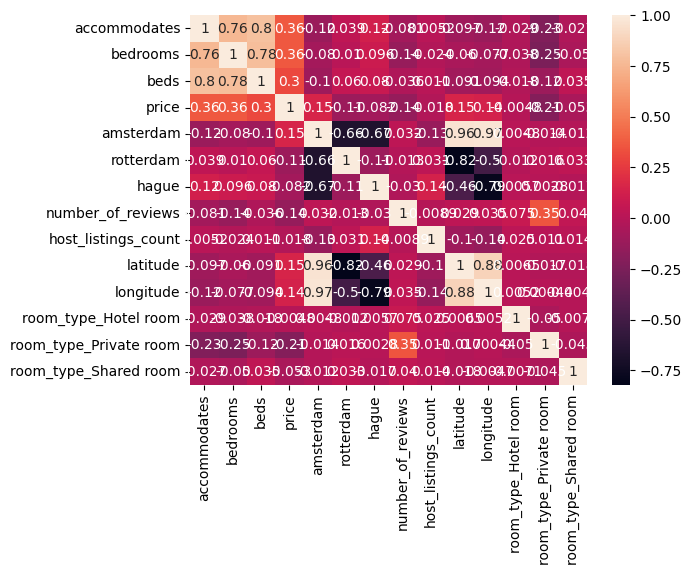

In [25]:
sns.heatmap(result.corr(), annot=True)

Before modelling lets drop bedrooms and beds are they are highly correlated

In [26]:
result.drop(columns=['beds', 'bedrooms'], inplace=True)

### 5. Models

### 5.1 Spliting into training and testing sets

In [27]:
final_columns = ['accommodates', 
                'amsterdam', 'rotterdam', 'hague', 'number_of_reviews',
                  'host_listings_count', 'latitude', 'longitude']

In [28]:
X = result.loc[: , final_columns]
y = result.loc[:,  ["price"]]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### 5.2 Scaling data
Scaling of data should happen after splitting the data into train and test sets. The purpose of that is to avoid data leakage.

In [30]:
scale = StandardScaler()
scaled_X_train = scale.fit_transform(X_train)
scaled_X_test = scale.fit_transform(X_test)

### 5.3 Training the model

For this project we will compare the performance of 3 different regression models:
 - Linear Regression
 - Decision Tree
 - XG Boost

### 5.3.1 Linear Regression

In [46]:
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)
reg.coef_

array([[ 4.30420329e+01,  1.72399919e+02, -1.07141012e+02,
        -6.52589068e+01, -2.18335320e-01,  2.05147705e-02,
        -3.55665379e+02, -8.58030607e+01]])

In [48]:
print(X_test.shape)
print(y_test.shape)


(1670, 8)
(1670, 1)


In [52]:
y_pred_LOGREG = reg.predict(X_test)

### 5.3.2 Decision Tree

[Text(0.5766305253774326, 0.9883720930232558, 'x[0] <= 3.5\ngini = 0.991\nsamples = 6679\nvalue = [1.0, 2.0, 1.0, 1.0, 1.0, 6.0, 1.0, 2.0, 2.0, 8.0\n2.0, 5.0, 7.0, 10.0, 9.0, 4.0, 4.0, 6.0, 12.0, 5.0\n4.0, 5.0, 10.0, 26.0, 8.0, 5.0, 4.0, 6.0, 19.0, 8.0\n5.0, 14.0, 9.0, 26.0, 10.0, 6.0, 6.0, 10.0, 27.0\n9.0, 2.0, 7.0, 16.0, 34.0, 12.0, 14.0, 10.0, 12.0\n63.0, 14.0, 7.0, 10.0, 20.0, 58.0, 12.0, 11.0, 9.0\n12.0, 44.0, 11.0, 14.0, 6.0, 25.0, 71.0, 15.0, 17.0\n11.0, 10.0, 69.0, 17.0, 7.0, 11.0, 57.0, 124.0, 19.0\n11.0, 14.0, 12.0, 23.0, 21.0, 12.0, 17.0, 26.0, 74.0\n23.0, 15.0, 12.0, 19.0, 41.0, 23.0, 7.0, 23.0, 22.0\n114.0, 19.0, 12.0, 18.0, 14.0, 97.0, 21.0, 12.0, 17.0\n38.0, 83.0, 18.0, 17.0, 11.0, 17.0, 47.0, 18.0, 5.0\n18.0, 31.0, 90.0, 23.0, 12.0, 13.0, 19.0, 40.0, 14.0\n5.0, 23.0, 56.0, 245.0, 15.0, 17.0, 13.0, 13.0, 34.0\n22.0, 17.0, 16.0, 39.0, 78.0, 13.0, 10.0, 13.0, 12.0\n45.0, 18.0, 10.0, 15.0, 22.0, 52.0, 18.0, 8.0, 9.0\n10.0, 109.0, 9.0, 11.0, 15.0, 25.0, 112.0, 11.0, 16.0\n8.

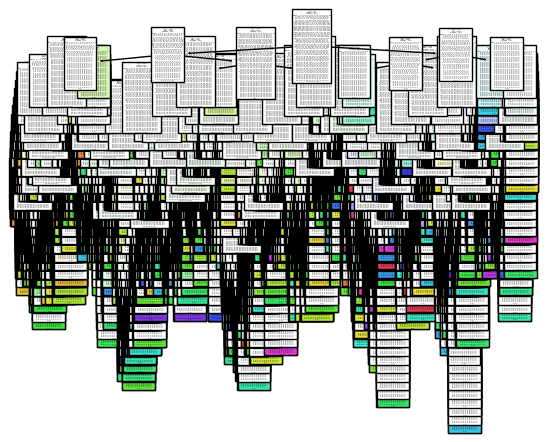

In [53]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)


In [54]:
y_pred_tree = dtree.predict(X_test)

### 5.3.3 XGBoost

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

xgboost = GradientBoostingRegressor(random_state=0)
xgboost.fit(X_train, y_train)

y_pred_xgboost = xgboost.predict(X_test)

/Users/konradwronski/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


### 6. Models evaluation

We will use 2 different metrics to evaluate our models:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def evaluate_model(model, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return print(f"For model: {model}, MSE: {mse}, MAE: {mae}")

In [56]:
evaluate_model("Linear Regression", y_test, y_pred_LOGREG)
evaluate_model("Decision Tree", y_test, y_pred_tree)
evaluate_model("XGBoost", y_test, y_pred_xgboost)

For model: Linear Regression, MSE: 50855.96013219502, MAE: 84.70703645913372
For model: Decision Tree, MSE: 64304.385628742515, MAE: 102.11377245508982
For model: XGBoost, MSE: 45962.38592200261, MAE: 74.36952542357778
